In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
import itertools


plt.style.use('ggplot')
%matplotlib inline

### Question-1

In [164]:
# import the data
df = pd.read_csv('Clustering_dataset_question1.csv')
print(f'No. of datapoints: {len(df)}')
df.head(5)

No. of datapoints: 500


,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679


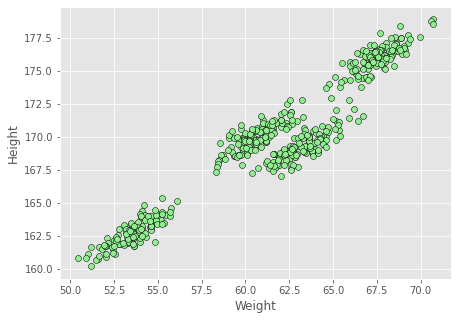

In [50]:
# visualise the data points
plt.figure(figsize=(7,5))
plt.scatter(df.Weight, df.Height, color='lightgreen', edgecolor='black')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

##### KMeans Clustering

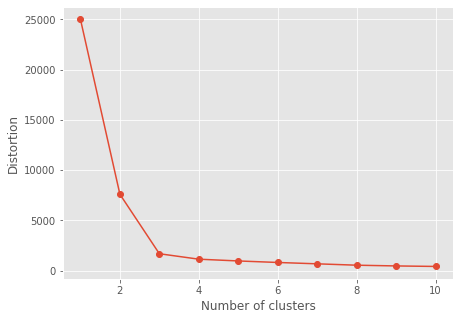

In [51]:
# Hyperparameter tuning for number of clusters by elbow method

X = df.copy()
distortions = []                       #list for saving inertia values

for i in range(1,11):
    km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, random_state=1) #initialize kmeans
    km.fit(X)                                                                         #fit model
    inertia = km.inertia_                                                             #get inertia value
    distortions.append(inertia)

#plot distortion vs number of clusters
plt.figure(figsize=(7,5))
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

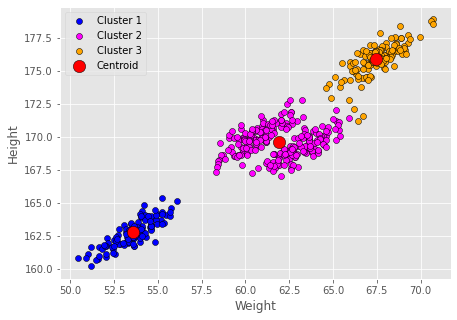

In [52]:
# from the above plot its evident that optimum number of clusters obtained by kmeans algorithm = 3
# run the kmeans algorithm for n_clusters = 3

km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, random_state=0)
X['y'] = km.fit_predict(X)

#plot the clusters
plt.figure(figsize=(7,5))
plt.scatter(X[X['y']==0].Weight, X[X['y']==0].Height, color= 'blue', edgecolor= 'black', label='Cluster 1')
plt.scatter(X[X['y']==1].Weight, X[X['y']==1].Height, color= 'magenta', edgecolor= 'black', label='Cluster 2')
plt.scatter(X[X['y']==2].Weight, X[X['y']==2].Height, color= 'orange', edgecolor= 'black', label='Cluster 3')

# plot the centroids
plt.scatter(km.cluster_centers_[:, 0],km.cluster_centers_[:, 1], s=150, marker='o',c='red', edgecolor='black',label='Centroid')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend()
plt.show()

##### GMM Clustering

In [58]:
X = df.copy()              
lowest_bic = np.Infinity
bic = []

n_components_range = range(1, 7)                    #list of n_components
cv_types = ['spherical', 'tied', 'diag', 'full']    #different cv_types

#do gmm clustering all combination of n_components and cv_types 
for cv_type in cv_types:
    for n in n_components_range:
        gmm = GaussianMixture(n_components=n,covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        
        #if new bic value is less than old values update best n_component, cv_type and model
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_n_comp = n
            best_cv_type = cv_type
            best_gmm = gmm

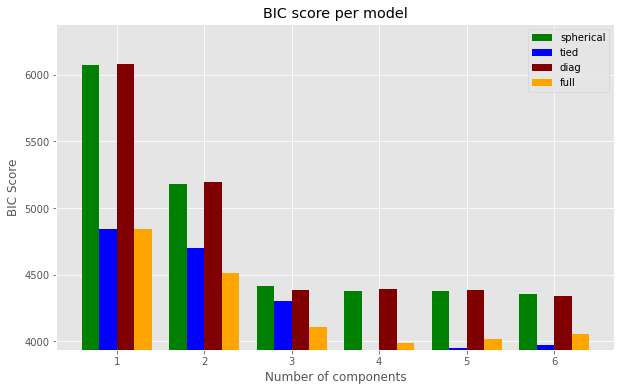

In [98]:
#plot bic score vs n_components in each 4 different cv_types
plt.figure(figsize=(10, 6))
colors = ['green','blue','maroon','orange']
bars = []

for i, (cv_type, color) in enumerate(zip(cv_types, colors)):
    x = np.array(n_components_range)+ 0.2*(i-1.5)
    plt.bar(x, bic[i * len(n_components_range):(i + 1) * len(n_components_range)],width=.2, color=color)
    
plt.xticks(n_components_range)
plt.ylim([bic.min(), bic.max()*1.05])                   #set lower limit of y as min(bic) so min(bic) shows zero
plt.title('BIC score per model')
plt.xlabel('Number of components')
plt.ylabel('BIC Score')
plt.legend(cv_types)
plt.show()

In [104]:
#from the above barplot best n_components=4 and cv_type = tied 
print('Best Parameters for GMM\n=======================')
print(f'n_components: {best_n_comp}\ncv_type     : {best_cv_type}')

Best Parameters for GMM
n_components: 4
cv_type     : tied


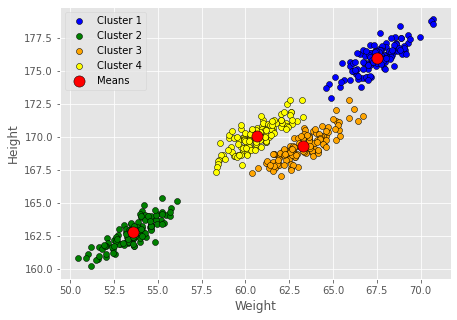

In [114]:
X['y'] = best_gmm.fit_predict(X)

#plot the clusters
plt.figure(figsize=(7,5))
plt.scatter(X[X['y']==0].Weight, X[X['y']==0].Height, color= 'blue', edgecolor= 'black', label='Cluster 1')
plt.scatter(X[X['y']==1].Weight, X[X['y']==1].Height, color= 'green', edgecolor= 'black', label='Cluster 2')
plt.scatter(X[X['y']==2].Weight, X[X['y']==2].Height, color= 'orange', edgecolor= 'black', label='Cluster 3')
plt.scatter(X[X['y']==3].Weight, X[X['y']==3].Height, color= 'yellow', edgecolor= 'black', label='Cluster 4')

# mark mean of the distribution
plt.scatter(best_gmm.means_[:, 0],best_gmm.means_[:, 1], s=125, marker='o',c='red', edgecolor='black',label='Means')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend()
plt.show()

##### Agglomerative Clustering


[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 58.83it/s]


[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [3].
[clusteval] >Fin.


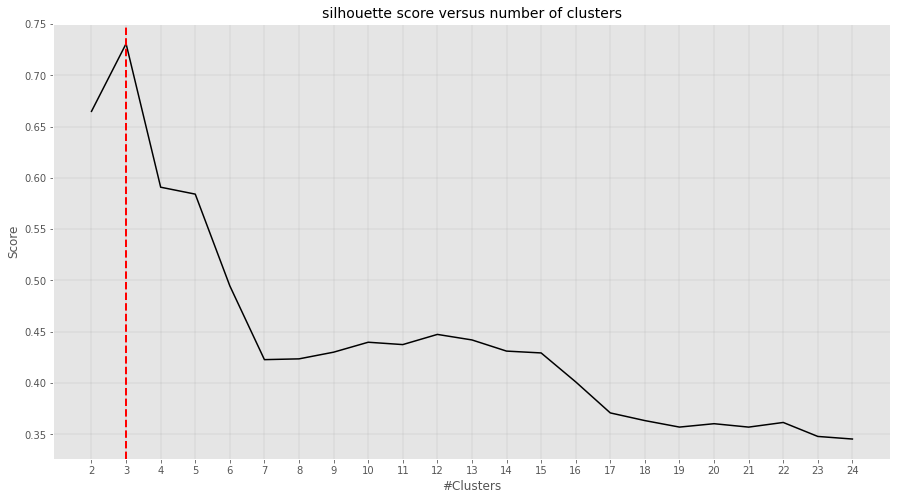

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'silhouette score versus number of clusters'}, xlabel='#Clusters', ylabel='Score'>)

In [30]:
#finding optimum number of clusters using clusteval library
X = df.copy()

from clusteval import clusteval
ce = clusteval(cluster='agglomerative')
ce.fit(np.array(X))
ce.plot()

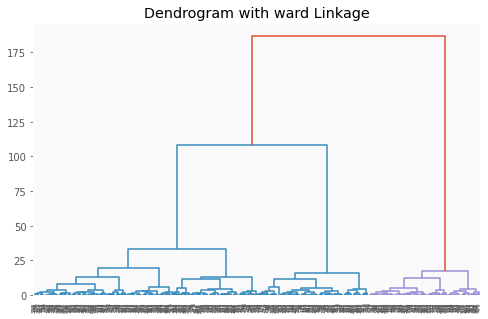

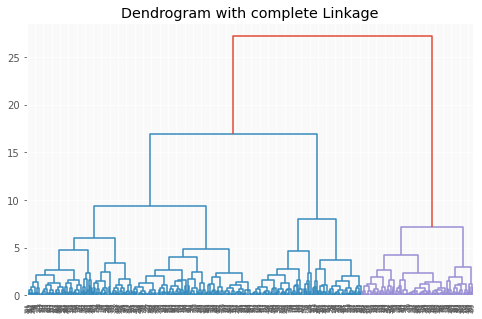

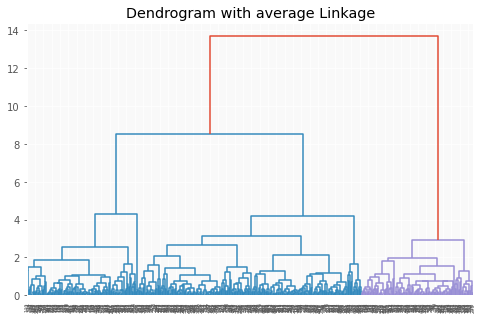

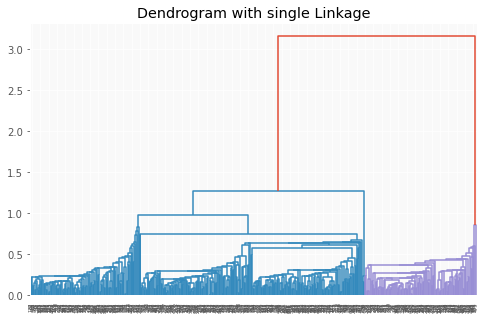

In [9]:
#from the above analysis optimum number of clusters is 3

#plot dendrogram for different linkages 

#create linkage matrix with average linkage
linkages =['ward', 'complete', 'average','single']

for link in linkages:
    Z= linkage(X, link)                                        
    plt.figure(figsize=(8, 5))
    dendrogram(Z, orientation='top', distance_sort='descending',show_leaf_counts=True)
    plt.title(f'Dendrogram with {link} Linkage')
    plt.show()

In [ ]:
#from the the above lingkage diagrams in the ward linkage, avarage linkage, complete linkage
#between 3 cluster and 2 cluster there is a big difference in distance, so optimum number of clusters is 3
#whil comparing among linkages ward linkage have big gap


In [32]:
#from the above barplot best n_components=4 and cv_type = tied 
print('Best Parameters for Agglomerative clustering\n=======================')
print(f'n_components: 3\nLinkage    : ward')

Best Parameters for Agglomerative clustering
n_components: 3
Linkage    : ward


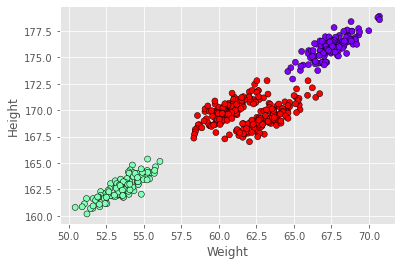

In [17]:
#agglomerative clustering with 3 clusters and average linkage
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
cluster.fit_predict(X)

#plot the clusters 
plt.scatter(X.Weight,X.Height, c=cluster.labels_, cmap='rainbow', edgecolor='black')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

## Question - 2

In [2]:
#import library for DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [3]:
data = pd.read_csv('data.csv')       #import data
data.head()

,x1,x2
0,3.06,5.64
1,2.76,4.38
2,0.00,0.00
3,3.49,7.80
4,2.69,4.32


In [8]:
data.shape

(178, 2)

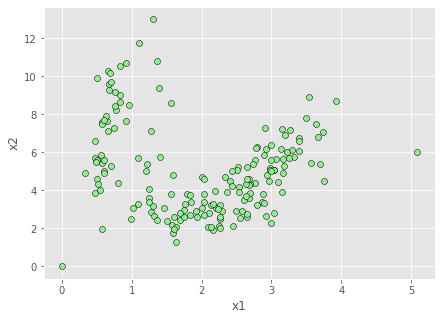

In [4]:
# visualise the data points
plt.figure(figsize=(7,5))
plt.scatter(data.x1, data.x2, color='lightgreen', edgecolor='black')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

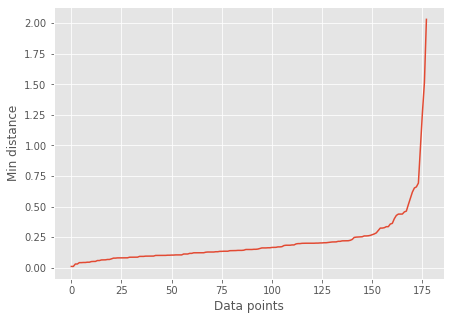

In [10]:
#finding eps and min_samples value
#its a two dimentional data so select min_samples =4


#calculate distance of each point to its 4 nerest neightbours using knn
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(data)
distances, indices = neighbors_fit.kneighbors(data)

#sort the distance in ascending order and get min distance of each point
distance = np.sort(distances, axis=0)
distance = distance[:,1]

#plot the distances
plt.figure(figsize=(7,5))
plt.plot(distance)
plt.xlabel('Data points')
plt.ylabel('Min distance')
plt.show()

In [ ]:
#from the above plot we can find eps = 0.5

In [14]:
dbscan = DBSCAN(eps=0.5, min_samples=4) #initilize dbscan model
dbscan.fit(data)                        #fit the model
labels = dbscan.labels_                 #labels of each data point
set(labels) 

{-1, 0, 1, 2, 3}

In [30]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)#if outlier present decrease 1 from number of unique values of labels
n_noise_ = list(labels).count(-1)                          #count noice point, ie points corresponding to label=-1
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 12


In [31]:
#make a new column to the data dataframe and save the labels to it
data['Outliers'] = labels
classes=data['Outliers'].unique()
classes

array([ 0, -1,  1,  2,  3], dtype=int64)

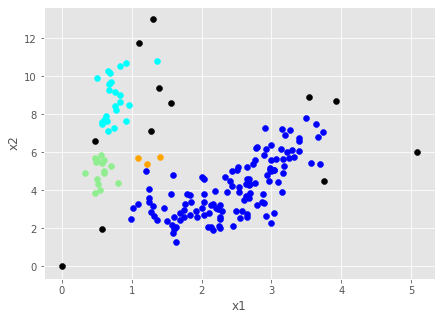

In [32]:
#plot the clusters
plt.figure(figsize=(7,5))
plt.scatter(data[data['Outliers']==0].x1, data[data['Outliers']==0].x2, color= 'blue')
plt.scatter(data[data['Outliers']==-1].x1, data[data['Outliers']==-1].x2, color= 'black')
plt.scatter(data[data['Outliers']==1].x1, data[data['Outliers']==1].x2, color= 'orange')
plt.scatter(data[data['Outliers']==2].x1, data[data['Outliers']==2].x2, color= 'lightgreen')
plt.scatter(data[data['Outliers']==3].x1, data[data['Outliers']==3].x2, color= 'magenta')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [179]:
#set value of column 'Outliers' as -1 corresponding to outlier point and others to zero
for i in range(len(data)):
    if data.iloc[i, 2]== -1:
        continue 
    else:
        data.iloc[i, 2] = 0     

In [180]:
data['Outliers'].unique()        #checking values updated or nor

array([ 0, -1], dtype=int64)

In [181]:
# write the result to the 'data.csv' file
data.to_csv('submission_data.csv')